In [1]:
import numpy as np
import os
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('/Users/jk/data_science')
from visual_identity import COLORS


In [4]:
directory = "monthly_playerbase_data"

monthly_data = {}
for filename in tqdm.tqdm([x for x in os.scandir(directory)]):
    with open(filename, "r") as file:
        lines = file.readlines()
        data = []
        for row in lines:
            line = [row[0:15],row[15:76],row[76:80],row[80:84],row[84:89],row[89:94],row[94:109],row[109:113],row[113:119],row[119:123],row[123:126],row[126:132],row[132:]]
            stripped = [x.strip() for x in line]
            data.append(stripped)

        df = pd.DataFrame(data[1:],columns=data[0])
        df = df.astype({"ID Number": int, df.columns[8]: int, "K": int, "B-day": int})
        
        monthly_data[df.columns[8]] = df

100%|██████████| 39/39 [02:00<00:00,  3.10s/it]


avg rating all:  1645
avg rating all active:  1652
avg rating all active & K!=40:  1838


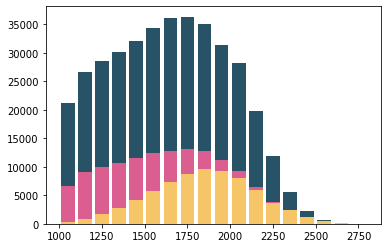

In [14]:
df = monthly_data["MAR22"]
df_active = df[(df.Flag != "i") & (df.Flag != "wi")]
df_active_k20 = df[(df.Flag != "i") & (df.Flag != "wi") & (df.K != 40)]

plt.hist(df.MAR22, bins=range(1000, 2900, 100), color=COLORS["blue"], rwidth=0.8)
plt.hist(df_active.MAR22, bins=range(1000, 2900, 100), color=COLORS["pink"], rwidth=0.8)
plt.hist(df_active_k20.MAR22, bins=range(1000, 2900, 100), color=COLORS["yellow"], rwidth=0.8)

print("avg rating all: ", round(np.mean(df.MAR22)))
print("avg rating all active: ", round(np.mean(df_active.MAR22)))
print("avg rating all active & K!=40: ", round(np.mean(df_active_k20.MAR22)))


# K is the development coefficient.
# K = 40 for a player new to the rating list until he has completed events with at least 30 games
# K = 40 for all players until their 18th birthday, as long as their rating remains under 2300.
# K = 20 as long as a player's rating remains under 2400.
# K = 10 once a player's published rating has reached 2400. It remains at this level subsequently, even if the rating drops below 2400.



In [12]:
for x in range(1000, 2900, 100):
    print(x)


1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
